In [11]:
import pandas as pd

In [12]:

dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [13]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df=dataset[['v1','v2']]

In [15]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape

(5572, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [19]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.duplicated().sum()

403

In [22]:
df=df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5169, 2)

In [25]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

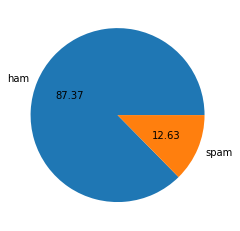

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
#Number of characters
df['Number_of_characters']=df['text'].apply(len)
#Num of sentences
df['Number_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
#Num of words
df['Number_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,Number_of_characters,Number_of_sentences,Number_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,24
1,ham,Ok lar... Joking wif u oni...,29,2,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,ham,U dun say so early hor... U c already then say...,49,1,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [30]:
df[['Number_of_characters','Number_of_sentences','Number_of_words']].describe()

,Number_of_characters,Number_of_sentences,Number_of_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.947185,18.453279
std,58.236293,1.362406,13.324793
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


In [31]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
#ham=0,spam=1


In [32]:
df.head()

,target,text,Number_of_characters,Number_of_sentences,Number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [33]:
#ham messages summary
df[df['target']==0][['Number_of_characters','Number_of_sentences','Number_of_words']].describe()

,Number_of_characters,Number_of_sentences,Number_of_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,17.120903
std,56.358207,1.278465,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


In [34]:
#Spam messages summary
df[df['target']==1][['Number_of_characters','Number_of_sentences','Number_of_words']].describe()

,Number_of_characters,Number_of_sentences,Number_of_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.967841,27.667688
std,30.137753,1.483201,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,8.000000,46.000000


Spam messages found to lengthier than ham messages! Hence lets check the distribution 

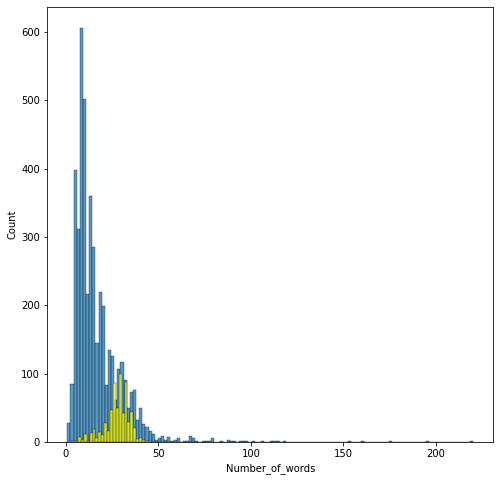

In [35]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.histplot(df[df['target']==0]['Number_of_words'])
sns.histplot(df[df['target']==1]['Number_of_words'],color='yellow')

## Text Processing :

In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string

In [40]:
def transform_text(text):
    text=text.lower()#converting to lower case
    text=nltk.word_tokenize(text)#breaking the sentence to words
    a=[]
    for i in text:#To remove special charcters
        if i.isalnum():#To keep alphanumerica and alphacharcters only
            a.append(i)
    text=a[:]#cloning to attach list 
    a.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        a.append(ps.stem(i))#stemming-before loving after love
        
    return " ".join(a)#to join all the stemmed words

In [42]:
import nltk

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
transform_text("I am going to hyderabad. Will you come with me")

'go hyderabad come'

In [46]:
ps.stem("lovings")

'love'

In [47]:
print(df['text'][10])
#check the the function after nltk
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
df['transformed_text']=df['text'].apply(transform_text)

In [49]:
df.head()

,target,text,Number_of_characters,Number_of_sentences,Number_of_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


Most used words in spam messages


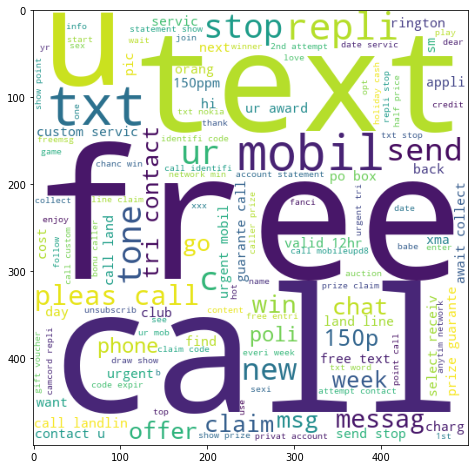

In [50]:
#Before building I want to check what are top most words used in the messages
#Using word cloud let's check the most using words in ham and spam messages
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(spam_wc)
print("Most used words in spam messages")

Most used words in ham messages


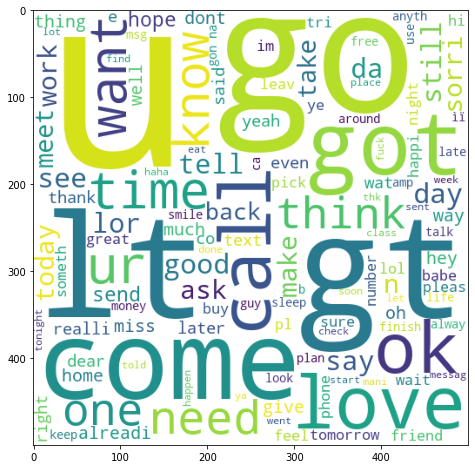

In [51]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(ham_wc)
print("Most used words in ham messages")

In [52]:
df.head()

,target,text,Number_of_characters,Number_of_sentences,Number_of_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
bow=CountVectorizer(max_features=3000)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [55]:
X=bow.fit_transform(df['transformed_text']).toarray()#Converting sparse array to dense array
y=df['target'].values

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [57]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print('GaussianNB')
print('accuracy_score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('---------------')
print('MultinomialNB')
mnb.fit(X_train,y_train)
y_pred_2=mnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))
print('precision_score',precision_score(y_test,y_pred_2))
print('---------------')
print('BernoulliNB')
bnb.fit(X_train,y_train)
y_pred_3=bnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_3))
print(confusion_matrix(y_test,y_pred_3))
print('precision_score',precision_score(y_test,y_pred_3))

GaussianNB
accuracy_score 0.8646034816247582
[[769 120]
 [ 20 125]]
precision_score 0.5102040816326531
---------------
MultinomialNB
accuracy_score 0.9709864603481625
[[871  18]
 [ 12 133]]
precision_score 0.8807947019867549
---------------
BernoulliNB
accuracy_score 0.9729206963249516
[[884   5]
 [ 23 122]]
precision_score 0.9606299212598425


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [65]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9381044487427466
Precision -  0.7913669064748201
For  KN
Accuracy -  0.9187620889748549
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  0.8807947019867549
For  DT
Accuracy -  0.9235976789168279
Precision -  0.9230769230769231
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9457364341085271
For  RF
Accuracy -  0.9680851063829787
Precision -  0.9912280701754386
For  AdaBoost
Accuracy -  0.9526112185686654
Precision -  0.8809523809523809
For  BgC
Accuracy -  0.9535783365570599
Precision -  0.8818897637795275
For  ETC
Accuracy -  0.97678916827853
Precision -  0.991869918699187
For  GBDT
Accuracy -  0.937137330754352
Precision -  0.8773584905660378
For  xgb
Accuracy -  0.9323017408123792
Precision -  0.8712871287128713


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [67]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.918762,1.000000
8,ETC,0.976789,0.991870
5,RF,0.968085,0.991228
4,LR,0.970986,0.945736
3,DT,0.923598,0.923077
7,BgC,0.953578,0.881890
6,AdaBoost,0.952611,0.880952
2,NB,0.970986,0.880795
9,GBDT,0.937137,0.877358
10,xgb,0.932302,0.871287
